<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/0915.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


weight : [[0.1292517]], bias : [-0.27210884]
[[0.63265306]]


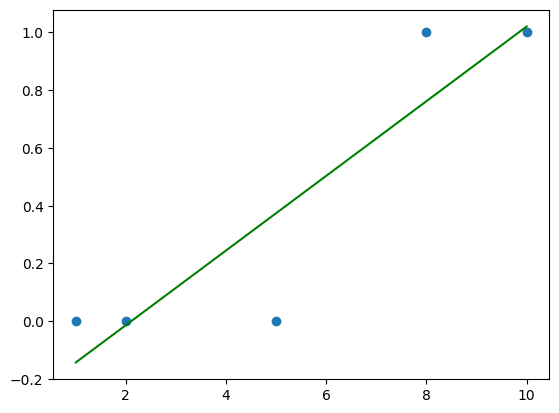

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Training Data Set
x_data = np.array([1, 2, 5, 8, 10]) # 공부시간
t_data = np.array([0, 0, 0, 1, 1])  # 합격여부(0: Fail, 1: Pass)

model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1, 1), t_data.reshape(-1, 1))

print('weight : {}, bias : {}'.format(model.coef_, model.intercept_))

result = model.predict([[7]])
print(result)

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*model.coef_.ravel()+model.intercept_, color='g') # ravel() 은 2차원 데이터를 1차원으로 만든다
plt.show()

weight : [[0.03500583]], bias : [0.17327888]
[[0.41831972]]


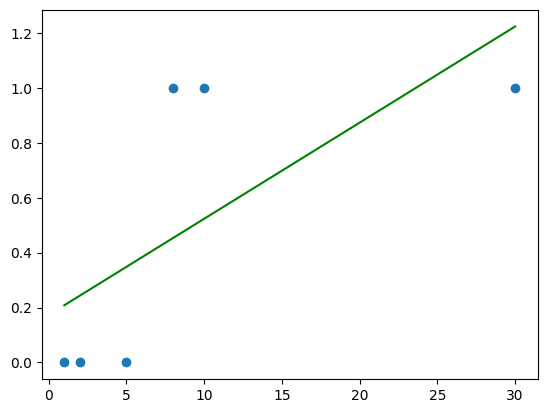

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Training Data Set
x_data = np.array([1, 2, 5, 8, 10, 30]) # 공부시간
t_data = np.array([0, 0, 0, 1, 1, 1])  # 합격여부(0: Fail, 1: Pass)

model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1, 1), t_data.reshape(-1, 1))

print('weight : {}, bias : {}'.format(model.coef_, model.intercept_))

result = model.predict([[7]])
print(result)

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*model.coef_.ravel()+model.intercept_, color='g') # ravel() 은 2차원 데이터를 1차원으로 만든다
plt.show()

In [9]:
# Logistic Regression 구현 (Sample data 이용)

import numpy as np
from sklearn import linear_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Training Data Set
x_data = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(-1, 1) # 2차원으로(공부시간)
t_data = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]).reshape(-1, 1) # 2차원으로(합격여부)

# sklearn 구현
sklearn_model = linear_model.LogisticRegression()

sklearn_model.fit(x_data, t_data.ravel())

study_hour = np.array([[13]])

predict_value = sklearn_model.predict(study_hour)
print(predict_value)  # [0] 결과값
predict_value_proba = sklearn_model.predict_proba(study_hour)
print(predict_value_proba)  #[[0.50009391 0.49990609]]   # 앞에가 떨어질 확률 뒤에가 붙을 확률


[0]
[[0.50009391 0.49990609]]


In [10]:
# tensorflow keras 구현

keras_model = Sequential()

keras_model.add(Flatten(input_shape = (1, )))
keras_model.add(Dense(units = 1, activation = 'sigmoid'))

keras_model.compile(optimizer = SGD(learning_rate = 1e-3), loss = 'binary_crossentropy')

keras_model.fit(x_data, t_data, epochs = 500, verbose = 0)

study_hour = np.array([[13]])
result = keras_model.predict(study_hour)
print(result) # [[0.6087394]]

1/1 [==============================] - 0s 136ms/step
[[0.6087394]]


In [17]:
# admission.csv

# 필요한 module lading

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD



In [18]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/admission.csv')
display(df)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


admit    0
gre      0
gpa      0
rank     0
dtype: int64


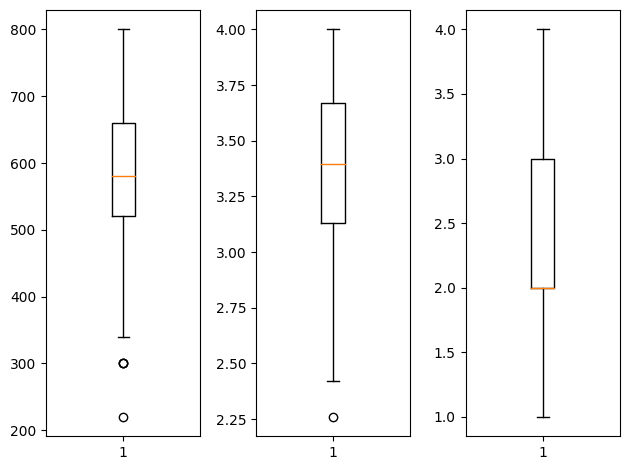

In [21]:
# 데이터 전처리
# 결측치
print(df.isnull().sum())

# 이상치 확인
fig = plt.figure()  # figure()는 큰 도화지를 만든다
fig_gre = fig.add_subplot(1, 3, 1) # 큰 도화지에 1행 3열의 그래프를 그리는데 첫번째꺼
fig_gpa = fig.add_subplot(1, 3, 2) # 큰 도화지에 1행 3열의 그래프를 그리는데 두번째꺼
fig_rank = fig.add_subplot(1, 3, 3) # 큰 도화지에 1행 3열의 그래프를 그리는데 세번째꺼

fig_gre.boxplot(df['gre'])
fig_gpa.boxplot(df['gpa'])
fig_rank.boxplot(df['rank'])

fig.tight_layout()
plt.show()

# 이상치로 판별되는 데이터가 존재하지만 실제로는 정상데이터
# 따라서 수치상 이상치로 판별된다 하더라도 확인작업을 거쳐야 함

# 정규화
x_data = df.drop('admit', axis = 1, inplace = False).values # 2차원 ndarray를 확보(독립변수)
t_data = df['admit'].values.reshape(-1, 1) # 2차원 ndarray를 확보(종속변수)

scaler_x = MinMaxScaler()
scaler_x.fit(x_data)
x_data_norm = scaler_x.transform(x_data) # 정규화된 x_data 확보



In [22]:
# sklearn 구현

sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data, t_data.ravel())

my_score = np.array([[600, 3.8, 1]])
predict_value = sklearn_model.predict(my_score)
predict_value_proba = sklearn_model.predict_proba(my_score)

print(predict_value, predict_value_proba) # [1] [[0.4308339 0.5691661]]  # 앞에가 0일 확률 뒤에가 1일 확률

[1] [[0.4308339 0.5691661]]


In [23]:
# tensorflow keras 구현

keras_model = Sequential()
keras_model.add(Flatten(input_shape = (3, )))
keras_model.add(Dense(units = 1, activation = 'sigmoid'))
keras_model.compile(optimizer = SGD(learning_rate = 1e-3), loss = 'binary_crossentropy')
keras_model.fit(x_data_norm, t_data, epochs = 500, verbose = 0)

my_score = np.array([[600, 3.8, 1]])
my_score_norm = scaler_x.transform(my_score)
result = keras_model.predict(my_score_norm)
print(result)  # [[0.47163865]]

1/1 [==============================] - 0s 45ms/step
[[0.47163865]]


In [27]:
# 성능평가를 위해 training data와 test data를 분리해서 사용
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/admission.csv')

# x_data, t_data
x_data = df.drop('admit', axis = 1, inplace = False).values # 2차원 ndarray를 확보(독립변수)
t_data = df['admit'].values # 2차원 ndarray를 확보(종속변수)


x_data_train, x_data_test, t_data_train, t_data_test = train_test_split(x_data, t_data, test_size = 0.3)

model = linear_model.LogisticRegression()
model.fit(x_data_train, t_data_train)

# evaluation(모델 평가)
result = model.score(x_data_test, t_data_test)
print(result)

0.7083333333333334
